In [2]:
from __future__ import division, print_function
import numpy as np
import pandas as pd
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
 
%matplotlib inline

In [4]:
train_df = pd.read_csv('howpop_train.csv')
test_df = pd.read_csv('howpop_test.csv')

print('/////////////////////////////////////')
print(train_df.head(1).T)
print('/////////////////////////////////////')
print(test_df.head(1).T)

/////////////////////////////////////
                                                               0
url                             https://habrahabr.ru/post/18284/
domain                                              habrahabr.ru
post_id                                                    18284
published                                    2008-01-01 18:19:00
author                                                    @Tapac
flow                                                     develop
polling                                                    False
content_len                                                 4305
title             Новогодний подарок блоггерам — WordPress 2.3.2
comments                                                       0
favs                                                           0
views                                                        236
votes_plus                                                   0.0
votes_minus                                         

In [5]:
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134137 entries, 0 to 134136
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   url               134137 non-null  object 
 1   domain            134137 non-null  object 
 2   post_id           134137 non-null  int64  
 3   published         134137 non-null  object 
 4   author            97657 non-null   object 
 5   flow              97048 non-null   object 
 6   polling           134137 non-null  bool   
 7   content_len       134137 non-null  int64  
 8   title             134137 non-null  object 
 9   comments          134137 non-null  int64  
 10  favs              134137 non-null  int64  
 11  views             134137 non-null  int64  
 12  votes_plus        133566 non-null  float64
 13  votes_minus       133566 non-null  float64
 14  views_lognorm     134137 non-null  float64
 15  favs_lognorm      134137 non-null  float64
 16  comments_lognorm  13

Ряд с датами столбца published
0   2008-01-01 18:19:00
1   2008-01-01 18:30:00
2   2008-01-01 18:34:00
3   2008-01-02 01:32:00
4   2008-01-02 14:34:00
Name: published, dtype: datetime64[ns]
Размер объекта Series:  (134137,)


<Axes: >

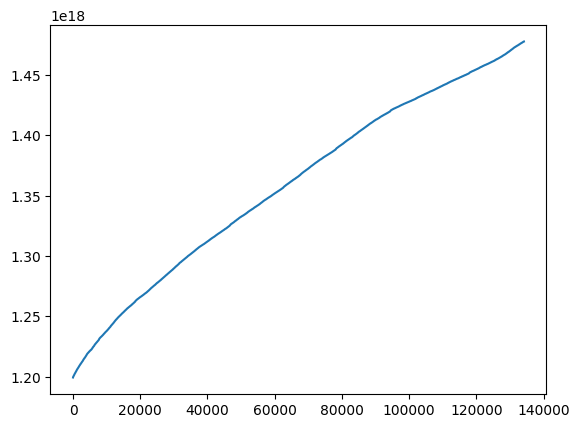

In [6]:
ser_data = train_df['published'].apply(lambda ts: pd.to_datetime(ts))
print('Ряд с датами столбца published')
print(ser_data.head())
print('Размер объекта Series: ', ser_data.shape)
ser_data.apply(lambda el: el.value).plot()

In [9]:
corr = train_df.corr(numeric_only=True)
corr[corr>0.9].replace({ np.nan: '' })

,post_id,polling,content_len,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
post_id,1.0,,,,,,,,,,
polling,,1.0,,,,,,,,,
content_len,,,1.0,,,,,,,,
comments,,,,1.0,,,,,,,
favs,,,,,1.0,,,,,,
views,,,,,,1.0,,,,,
votes_plus,,,,,,,1.0,,,,
votes_minus,,,,,,,,1.0,,,
views_lognorm,,,,,,,,,1.0,,
favs_lognorm,,,,,,,,,,1.0,


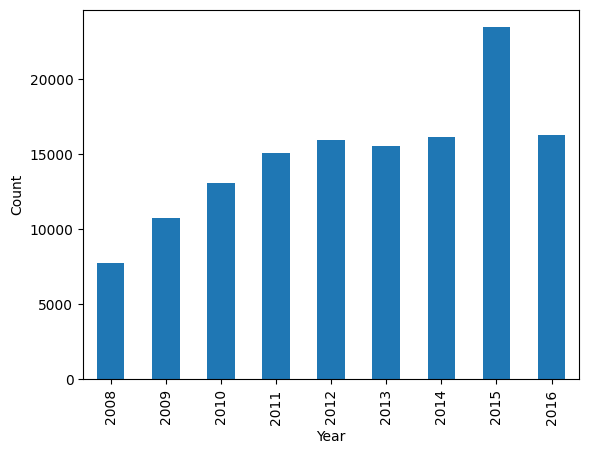

In [16]:
df = train_df.copy()
df['published'] = pd.to_datetime(df['published']).dt.year
ss = df['published'].value_counts()
ss.sort_index().plot(kind='bar', xlabel='Year', ylabel='Count')
plt.show()

In [19]:
features = ['author', 'flow', 'domain', 'title']
train_size = int(0.7 * train_df.shape[0])
print('Example of initial set: ', len(train_df), 'Size of learning set', train_size)

X, y = train_df.loc[:, features], train_df['favs_lognorm']
X_test = test_df.loc[:, features]
X_train, X_valid = X.iloc[:train_size, :], X.iloc[train_size:, :]
y_train, y_valid = y.iloc[:train_size], y.iloc[train_size:]

Example of initial set:  134137 Size of learning set 93895


In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_title = TfidfVectorizer(min_df=3, max_df=0.3, ngram_range=(1,3))

vX_train_title = vectorizer_title.fit(X_train['title'])
print('vX_train_title.vocabulary_: ', len(vX_train_title.vocabulary_))
vX_valid_title = vectorizer_title.fit(X_valid['title'])
print('vX_valid_title.vocabulary_: ', len(vX_valid_title.vocabulary_))
vX_test_title = vectorizer_title.fit(X_test['title'])
print('vX_test_title.vocabulary_: ', len(vX_test_title.vocabulary_))

X_train_title = vectorizer_title.fit_transform(X_train['title'])
print('X_train_title.shape: ', X_train_title.shape)
X_valid_title = vectorizer_title.transform(X_valid['title'])
print('X_valid_title.shape: ', X_valid_title.shape)
X_test_title = vectorizer_title.transform(X_test['title'])
print('X_test_title.shape: ', X_test_title.shape)

vX_train_title.vocabulary_:  50624
vX_valid_title.vocabulary_:  28528
vX_test_title.vocabulary_:  2768
X_train_title.shape:  (93895, 50624)
X_valid_title.shape:  (40242, 50624)
X_test_title.shape:  (3990, 50624)


# Индивидуальное задание

> Задание является дубликатом lr4